# Kaggle Competition

# Titanic: Machine Learning from Disaster

In [2]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

## 1. Loading the Training Data

In [3]:
raw_df = pd.read_csv('data/train.csv', index_col=0)
raw_df.fillna(0, inplace=True)
raw_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S


## 2. Pre-process the data

Now the columns need to be transformed to numbers.

In [4]:
raw_df.select_dtypes('object').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 5 columns):
Name        891 non-null object
Sex         891 non-null object
Ticket      891 non-null object
Cabin       891 non-null object
Embarked    891 non-null object
dtypes: object(5)
memory usage: 41.8+ KB


### Name


In [5]:
raw_df.Name = pd.Categorical(raw_df.Name, ordered=False)
raw_df.Name.head()

PassengerId
1                              Braund, Mr. Owen Harris
2    Cumings, Mrs. John Bradley (Florence Briggs Th...
3                               Heikkinen, Miss. Laina
4         Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                             Allen, Mr. William Henry
Name: Name, dtype: category
Categories (891, object): [Abbing, Mr. Anthony, Abbott, Mr. Rossmore Edward, Abbott, Mrs. Stanton (Rosa Hunt), Abelson, Mr. Samuel, ..., de Pelsmaeker, Mr. Alfons, del Carlo, Mr. Sebastiano, van Billiard, Mr. Austin Blyler, van Melkebeke, Mr. Philemon]

### Sex

In [6]:
raw_df.Sex = pd.Categorical(raw_df.Sex, ordered=False)
raw_df.Sex.head()

PassengerId
1      male
2    female
3    female
4    female
5      male
Name: Sex, dtype: category
Categories (2, object): [female, male]

### Ticket

In [7]:
raw_df.Ticket = pd.Categorical(raw_df.Ticket, ordered=False)
raw_df.Ticket.head()

PassengerId
1           A/5 21171
2            PC 17599
3    STON/O2. 3101282
4              113803
5              373450
Name: Ticket, dtype: category
Categories (681, object): [110152, 110413, 110465, 110564, ..., W./C. 6609, W.E.P. 5734, W/C 14208, WE/P 5735]

### Cabin

In [8]:
raw_df.Cabin = pd.Categorical(raw_df.Cabin, ordered=False)
raw_df.Cabin.head()

PassengerId
1       0
2     C85
3       0
4    C123
5       0
Name: Cabin, dtype: category
Categories (148, object): [0, A10, A14, A16, ..., F38, F4, G6, T]

### Embarked

In [9]:
raw_df.Embarked = pd.Categorical(raw_df.Embarked, ordered=False)
raw_df.Embarked.head()

PassengerId
1    S
2    C
3    S
4    S
5    S
Name: Embarked, dtype: category
Categories (4, object): [0, C, Q, S]

In [10]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null category
Sex         891 non-null category
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null category
Fare        891 non-null float64
Cabin       891 non-null category
Embarked    891 non-null category
dtypes: category(5), float64(2), int64(4)
memory usage: 134.4 KB


### Categorical Columns

In categorical columns, replace the text by their codes

In [11]:
cat_cols = ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
for col in cat_cols:
    raw_df[col] = raw_df[col].cat.codes
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null int16
Sex         891 non-null int8
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null int16
Fare        891 non-null float64
Cabin       891 non-null int16
Embarked    891 non-null int8
dtypes: float64(2), int16(3), int64(4), int8(2)
memory usage: 55.7 KB


### Train data

Split dataset to build the model. Not separating validation dataset yet.

In [57]:
y = raw_df.Survived
df = raw_df.drop(['Name', 'Survived'], axis=1)

In [58]:
m = RandomForestClassifier(n_jobs=-1, n_estimators=30)
m.fit(df, y)
m.score(df, y)

0.9966329966329966

### Split train test
Ok, now to test overfitting let's split the train dataset, into train and test.

In [59]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=42)
m.fit(X_train, y_train)
m.score(X_test, y_test)

0.7873134328358209

In [60]:
import math
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_test), y_test),
                m.score(X_train, y_train), m.score(X_test, y_test)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [61]:
m.fit(X_train, y_train)
print_score(m)

[0.06939315030888374, 0.4611795389695635, 0.9951845906902087, 0.7873134328358209]


In [52]:
m = RandomForestClassifier(n_jobs=-1, n_estimators=30, min_samples_leaf=1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.14445336159384606, 0.4611795389695635, 0.9791332263242376, 0.7873134328358209, 0.7993579454253612]


### Cross-validation

In [53]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(m, df, y, cv=5))

0.8137952263770277

### Grid Search 

In [19]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators':[10,20,30,40,50],
              'min_samples_leaf':np.arange(1,10),
              'oob_score':[True]}
cv = GridSearchCV(m, param_grid, cv=5)

In [20]:
cv.fit(df,y)

/mnt/d/WSL/anaconda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/mnt/d/WSL/anaconda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/mnt/d/WSL/anaconda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/mnt/d/WSL/anaconda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/mnt/d/WSL/anaconda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB

/mnt/d/WSL/anaconda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/mnt/d/WSL/anaconda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/mnt/d/WSL/anaconda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/mnt/d/WSL/anaconda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/mnt/d/WSL/anaconda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB

/mnt/d/WSL/anaconda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/mnt/d/WSL/anaconda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/mnt/d/WSL/anaconda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/mnt/d/WSL/anaconda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/mnt/d/WSL/anaconda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=-1,
            oob_score=True, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [10, 20, 30, 40, 50], 'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]), 'oob_score': [True]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [21]:
cv.best_params_

{'min_samples_leaf': 5, 'n_estimators': 40, 'oob_score': True}

In [22]:
cv.best_score_

0.8271604938271605

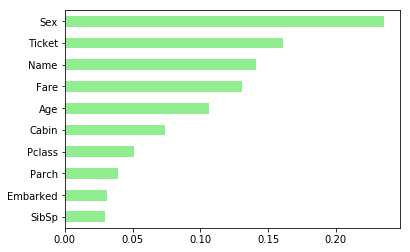

In [23]:
importances_rf = pd.Series(m.feature_importances_, index = df.columns)

# Sort importances_rf
sorted_importances_rf = importances_rf.sort_values()
# Make a horizontal bar plot
sorted_importances_rf.plot(kind='barh', color='lightgreen')
plt.show()

### Test dataset from Kaggle

Run prediction on kaggle 'test' dataset

In [62]:
test_kaggle = pd.read_csv('data/test.csv', index_col=0)
test_kaggle.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [63]:
def preprocess(df):
    df = df.fillna(0)
    cat_cols = ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
    for col in cat_cols:
        df[col] = pd.Categorical(df[col], ordered=False)
        df[col] = df[col].cat.codes
    return df

test_kaggle = preprocess(test_kaggle)
test_kaggle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
Pclass      418 non-null int64
Name        418 non-null int16
Sex         418 non-null int8
Age         418 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null int16
Fare        418 non-null float64
Cabin       418 non-null int8
Embarked    418 non-null int8
dtypes: float64(2), int16(2), int64(3), int8(3)
memory usage: 22.5 KB


In [64]:
m = RandomForestClassifier(n_jobs=-1, n_estimators=30, min_samples_leaf=1, oob_score=True)

m.fit(X_train, y_train)

test_kaggle.drop(['Name'], axis=1, inplace=True)
y_pred = m.predict(test_kaggle)

print_score(m)

[0.06939315030888374, 0.4447034900131218, 0.9951845906902087, 0.8022388059701493, 0.8105939004815409]


### Save results to dataframe and write to csv submission file

In [65]:
results = pd.DataFrame({'PassengerId':test_kaggle.index,'Survived':y_pred}).set_index('PassengerId')
results.head()
results.to_csv('data/kaggle-titanic-sub001.csv')